In [38]:
!pip install geopy
!pip install plotly

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import geopy
from geopy.geocoders import Nominatim

# Load the dataset into a Pandas DataFrame
data = pd.read_excel('emdat_public_2023_05_02_query_uid-umjMCi.xlsx')

# Convert the 'Longitude' and 'Latitude' columns to strings
data['Longitude'] = data['Longitude'].astype(str)
data['Latitude'] = data['Latitude'].astype(str)

selected_columns = ['Dis No', 'Year', 'Disaster Type', 'Disaster Subgroup', 'Disaster Subtype', 'Country', 'Longitude', 'Latitude']

def select_columns(dataset):
    return dataset[selected_columns]

def complete_coordinates(dataset):
    geolocator = Nominatim(user_agent="your_app_name")  # Initialize the geocoding service
    
    for index, row in dataset.iterrows():
        if pd.isnull(row['Latitude']) or pd.isnull(row['Longitude']):
            try:
                location = geolocator.geocode(query=row['Country'])
                if location is not None:
                    dataset.at[index, 'Latitude'] = location.latitude
                    dataset.at[index, 'Longitude'] = location.longitude
            except geopy.exc.GeocoderTimedOut:
                # Handle timeout exception, if necessary
                continue

    return dataset


selected = select_columns(data)
processed_data = complete_coordinates(selected)

import re
# Remove non-numerical characters from Latitude column
processed_data['Latitude'] = processed_data['Latitude'].apply(lambda x: re.sub(r'[^0-9.-]', '', str(x)))
# Remove non-numerical characters from Longitude column
processed_data['Longitude'] = processed_data['Longitude'].apply(lambda x: re.sub(r'[^0-9.-]', '', str(x)))

# Display the updated dataset
print(processed_data)




              Dis No  Year      Disaster Type Disaster Subgroup  \
0      1900-9002-CPV  1900            Drought    Climatological   
1      1900-9001-IND  1900            Drought    Climatological   
2      1902-0012-GTM  1902         Earthquake       Geophysical   
3      1902-0003-GTM  1902  Volcanic activity       Geophysical   
4      1902-0010-GTM  1902  Volcanic activity       Geophysical   
...              ...   ...                ...               ...   
16626  2023-0110-ZMB  2023              Flood      Hydrological   
16627  2023-0068-ZMB  2023           Epidemic        Biological   
16628  2023-0095-ZWE  2023              Storm    Meteorological   
16629  2023-0022-SRB  2023              Flood      Hydrological   
16630  2023-0140-SSD  2023           Epidemic        Biological   

        Disaster Subtype      Country Longitude Latitude  
0                Drought   Cabo Verde                     
1                Drought        India                     
2        Ground mo

C:\Users\varlo\AppData\Local\Temp\ipykernel_18180\530169669.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\varlo\AppData\Local\Temp\ipykernel_18180\530169669.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



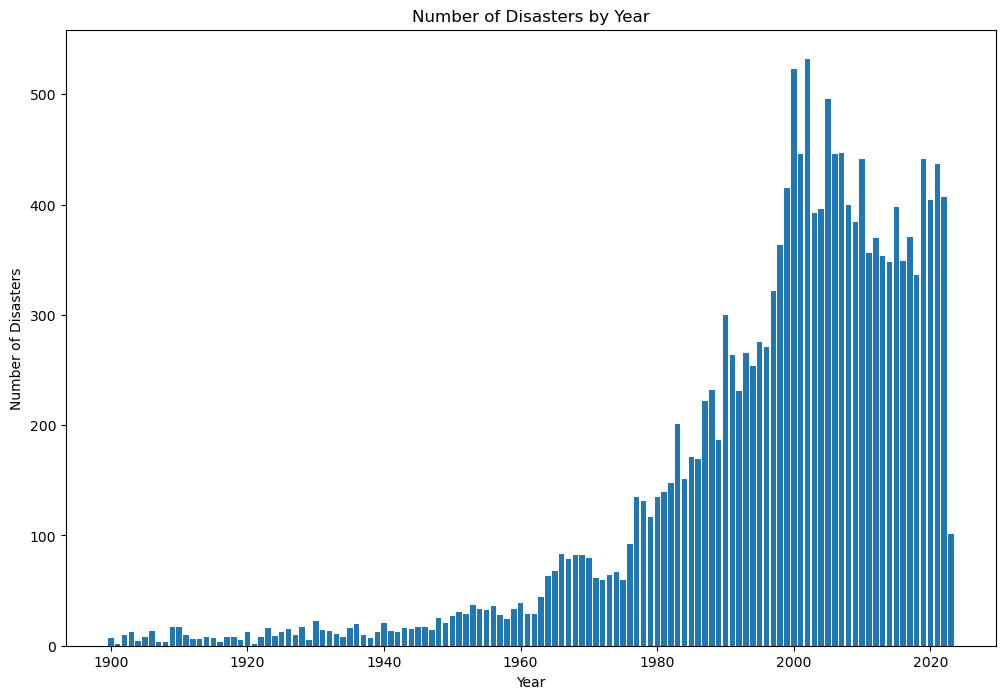

In [40]:
# Group the data by year and count the number of occurrences
disasters_by_year = processed_data.groupby('Year').size()

# Create a bar chart or histogram
plt.figure(figsize=(12, 8))
plt.bar(disasters_by_year.index, disasters_by_year.values)

# Customize the chart appearance
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.title('Number of Disasters by Year')

# Show the histogram
plt.show()

In [41]:
import plotly.express as px

# Group the data by year and disaster type and count the number of occurrences
disasters_by_year_type = data.groupby(['Year', 'Disaster Type']).size().unstack().reset_index()

# Melt the dataframe to convert columns into long format
disasters_by_year_type_melted = disasters_by_year_type.melt(id_vars='Year', var_name='Disaster Type', value_name='Count')

# Create the stacked bar chart using Plotly Express
fig = px.bar(disasters_by_year_type_melted, x='Year', y='Count', color='Disaster Type', barmode='stack')

# Customize the chart appearance
fig.update_layout(
    title='Number of Disasters by Year and Type',
    xaxis_title='Year',
    yaxis_title='Number of Disasters'
)

# Show the chart
fig.show()


In [42]:
import pandas as pd
import plotly.express as px
import geopy
from geopy.geocoders import Nominatim
# Group the data by year and disaster type and count the number of occurrences
disasters_by_year_type = processed_data.groupby(['Year', 'Disaster Type']).size().unstack().reset_index()

# Melt the dataframe to convert columns into long format
disasters_by_year_type_melted = disasters_by_year_type.melt(id_vars='Year', var_name='Disaster Type', value_name='Count')

# Create a world map plot using Plotly Express
fig = px.scatter_geo(processed_data, lat='Latitude', lon='Longitude', color='Disaster Type',
                     hover_name='Disaster Type', projection='natural earth')

# Customize the chart appearance
fig.update_layout(
    title='Natural Disasters Worldwide',
    geo=dict(showcountries=True)
)

# Show the chart
fig.show()

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load the dataset for earthquakes
data = pd.read_csv('earthquakes_datas.csv')

# Split the data into features (X) and target variable (y)
X = data[['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst']]
y = data['type']

# Convert categorical variables to numerical representation
label_encoder = LabelEncoder()
X['magType'] = label_encoder.fit_transform(X['magType'])

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent' depending on your preference
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


C:\Users\varlo\AppData\Local\Temp\ipykernel_18180\1260269761.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Accuracy: 0.9995248336917921


In [46]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

C:\Users\varlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\varlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\varlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\varlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` param

Classification Report:
                        precision    recall  f1-score   support

        acoustic noise       0.00      0.00      0.00         1
            earthquake       1.00      1.00      1.00     39650
experimental explosion       1.00      1.00      1.00         1
             explosion       0.97      0.97      0.97       121
             ice quake       0.00      0.00      0.00         0
             landslide       0.00      0.00      0.00         1
         mine collapse       0.00      0.00      0.00         3
      mining explosion       0.99      1.00      1.00       191
           other event       0.00      0.00      0.00         3
          quarry blast       1.00      0.50      0.67         4
            rock burst       1.00      0.67      0.80         6
     volcanic eruption       1.00      1.00      1.00         5

              accuracy                           1.00     39986
             macro avg       0.58      0.51      0.54     39986
          weigh

C:\Users\varlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\varlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [47]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[    0     1     0     0     0     0     0     0     0     0     0     0]
 [    0 39647     0     3     0     0     0     0     0     0     0     0]
 [    0     0     1     0     0     0     0     0     0     0     0     0]
 [    0     3     0   117     0     0     0     1     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     1     0     0     0     0     0     0     0     0     0     0]
 [    0     3     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0   191     0     0     0     0]
 [    0     2     0     0     1     0     0     0     0     0     0     0]
 [    0     2     0     0     0     0     0     0     0     2     0     0]
 [    0     2     0     0     0     0     0     0     0     0     4     0]
 [    0     0     0     0     0     0     0     0     0     0     0     5]]


In [48]:
importances = model.feature_importances_
feature_names = ['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst']

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = [feature_names[i] for i in sorted_indices]

# Print the feature importance ranking
print("Feature Importance:")
for feature, importance in zip(sorted_features, sorted_importances):
    print(f"{feature}: {importance}")


Feature Importance:
depth: 0.350142579803211
latitude: 0.13574396657098226
longitude: 0.13477970756136698
depthError: 0.07377462675591548
dmin: 0.062021399158422794
magError: 0.05191154938745905
rms: 0.051545219496576825
nst: 0.03079258764367262
mag: 0.02960578670213428
magNst: 0.025231694656453047
horizontalError: 0.02389296382430021
gap: 0.02188016435527996
magType: 0.008677754084225586


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data2 = pd.read_csv('earthquakes_datas.csv')

# Split the data into features (X) and target variable (y)
X = data2[['latitude', 'longitude', 'depth', 'magType', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst']]
y = data2['mag']

# Convert categorical variables to numerical representation
X = pd.get_dummies(X, columns=['magType'])

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent' depending on your preference
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.054302499180463176


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv('earthquakes_datas.csv')

# Split the data into features (X) and target variable (y)
X = data[['latitude', 'longitude', 'depth', 'magType', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst']]
y = data['mag']

# Convert categorical variables to numerical representation
X = pd.get_dummies(X, columns=['magType'])

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent' depending on your preference
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, predictions)
print("R-squared Score:", r2)


R-squared Score: 0.9325471202533444
